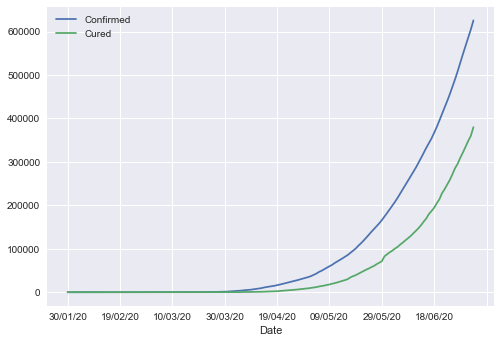

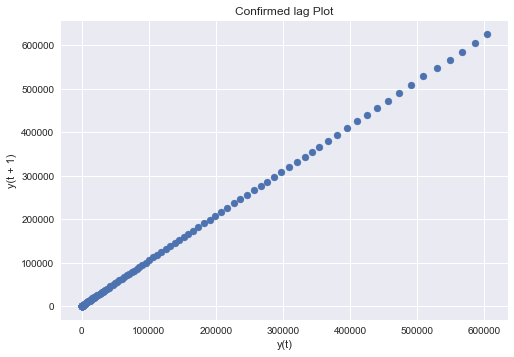

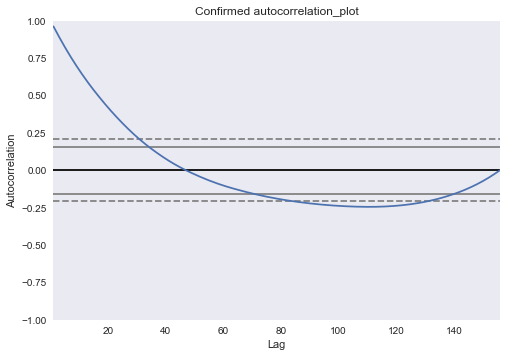

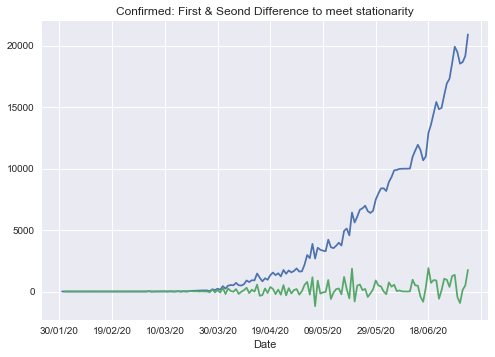

C:\Users\GHOST\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\GHOST\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


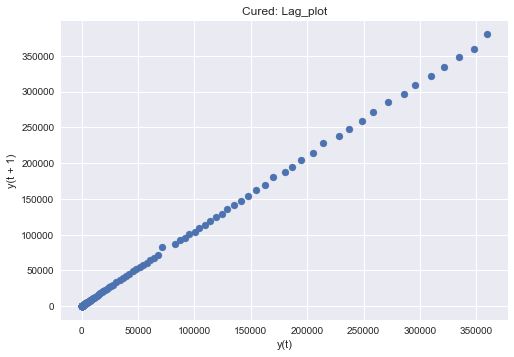

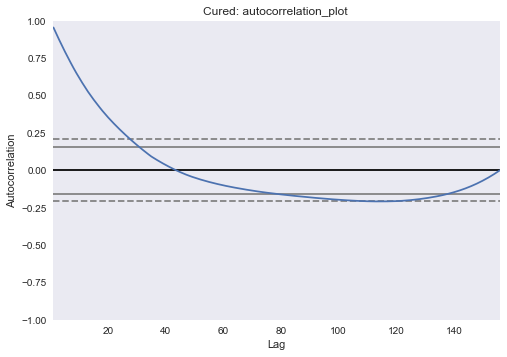

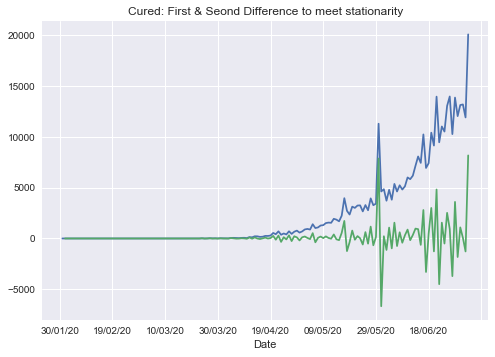

C:\Users\GHOST\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\GHOST\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
%matplotlib inline
plt.style.use('seaborn')

CovidDF = pd.read_csv("States_covid_19_india.csv")
Predict  = CovidDF[['Date','Confirmed','Cured']].set_index('Date')
PredAG = Predict.groupby('Date',sort=False).sum()
PredAG.plot()
plt.show()
pd.plotting.lag_plot(PredAG['Confirmed'])
plt.title('Confirmed lag Plot')
plt.show()
pd.plotting.autocorrelation_plot(PredAG['Confirmed'])
plt.title('Confirmed autocorrelation_plot')
plt.show()
PredAG['Confirmed'].corr(PredAG['Confirmed'].shift(28))
PredAG['I1']=PredAG['Confirmed'].diff()
PredAG['I1'].plot()
PredAG['I2']=PredAG['I1'].diff()
PredAG['I2'].plot(title = 'Confirmed: First & Seond Difference to meet stationarity')
plt.show()
X = PredAG['I2'].dropna()
train_data = X[1:len(X)-28]
test_data = X[X[len(X)-28:]]
model = AR(train_data)
model_fitted = model.fit()
pd.plotting.lag_plot(PredAG['Cured'])
plt.title('Cured: Lag_plot')
plt.show()
pd.plotting.autocorrelation_plot(PredAG['Cured'])
plt.title('Cured: autocorrelation_plot ')
plt.show()
PredAG['Cured'].corr(PredAG['Cured'].shift(28))
PredAG['I11']=PredAG['Cured'].diff()
PredAG['I11'].plot()
PredAG['I22']=PredAG['I11'].diff()
PredAG['I22'].plot(title = 'Cured: First & Seond Difference to meet stationarity')
plt.show()
X = PredAG['I22'].dropna()
train_data = X[1:len(X)-28]
test_data = X[X[len(X)-28:]]
model = AR(train_data)
model_fitted = model.fit()
